In [3]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd

## Analize patients

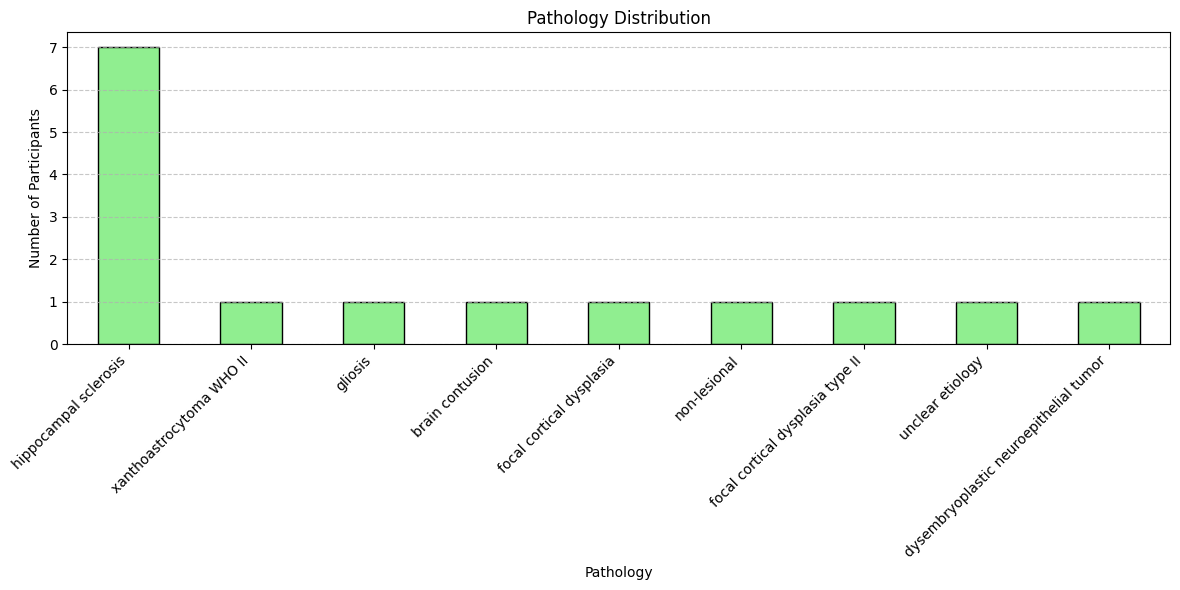

In [4]:
#import tsv participant data
data = pd.read_csv('data/participants.tsv', sep='\t')

# Plotting the Pathology Distribution (Top 10 for clarity)
pathology_counts = data['pathology'].value_counts()

plt.figure(figsize=(12, 6))
pathology_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Pathology Distribution')
plt.xlabel('Pathology')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

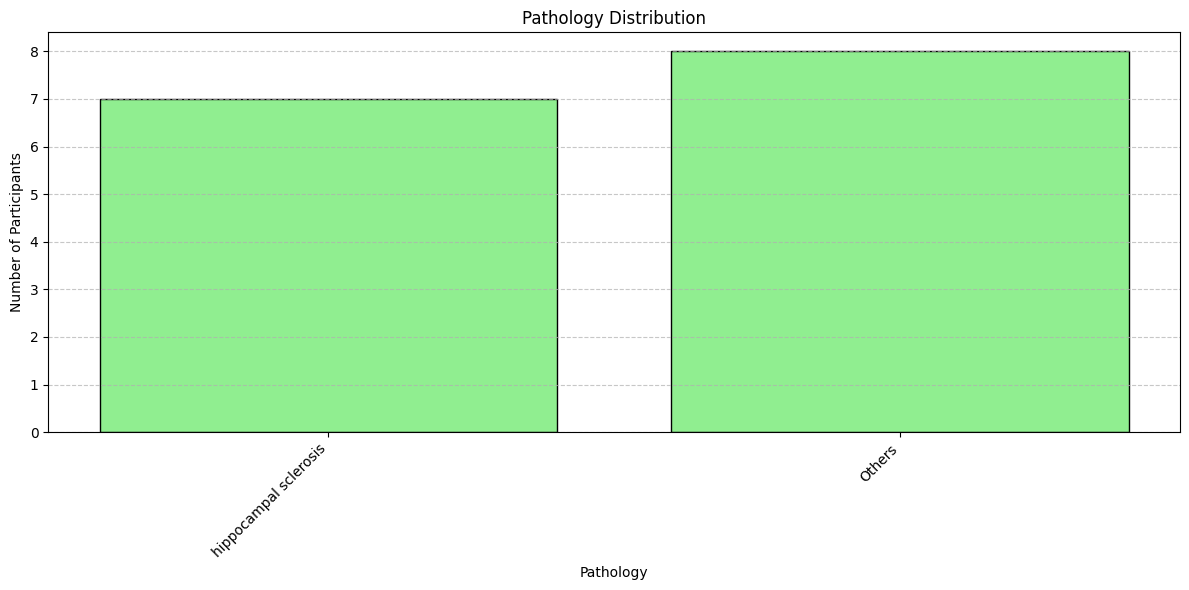

In [18]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the participant data from a TSV file
data = pd.read_csv('data/participants.tsv', sep='\t')

# Count the occurrences of each pathology
pathology_counts = data['pathology'].value_counts()

# Set a threshold for grouping rare pathologies as 'Others' (e.g., top 10 for clarity)
top_n = 1

# Get the top N pathologies and count the rest as 'Others'
top_pathologies = pathology_counts[:top_n]
other_count = pathology_counts[top_n:].sum()

# Create a DataFrame for the top N pathologies
top_pathologies_df = top_pathologies.reset_index()
top_pathologies_df.columns = ['Pathology', 'Count']

# Create a DataFrame for 'Others'
others_df = pd.DataFrame({'Pathology': ['Others'], 'Count': [other_count]})

# Concatenate the top pathologies and 'Others' DataFrames
plot_data = pd.concat([top_pathologies_df, others_df], ignore_index=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(plot_data['Pathology'], plot_data['Count'], color='lightgreen', edgecolor='black')
plt.title('Pathology Distribution')
plt.xlabel('Pathology')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


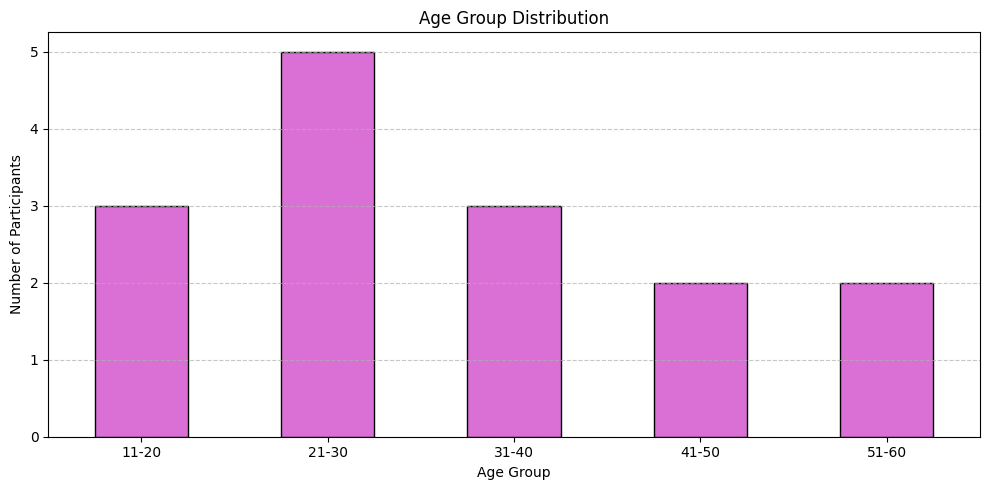

In [8]:
# Creating age brackets
bins = [10, 20, 30, 40, 50, 60]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Plotting the Age Group Distribution
age_group_counts = data['age_group'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
age_group_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

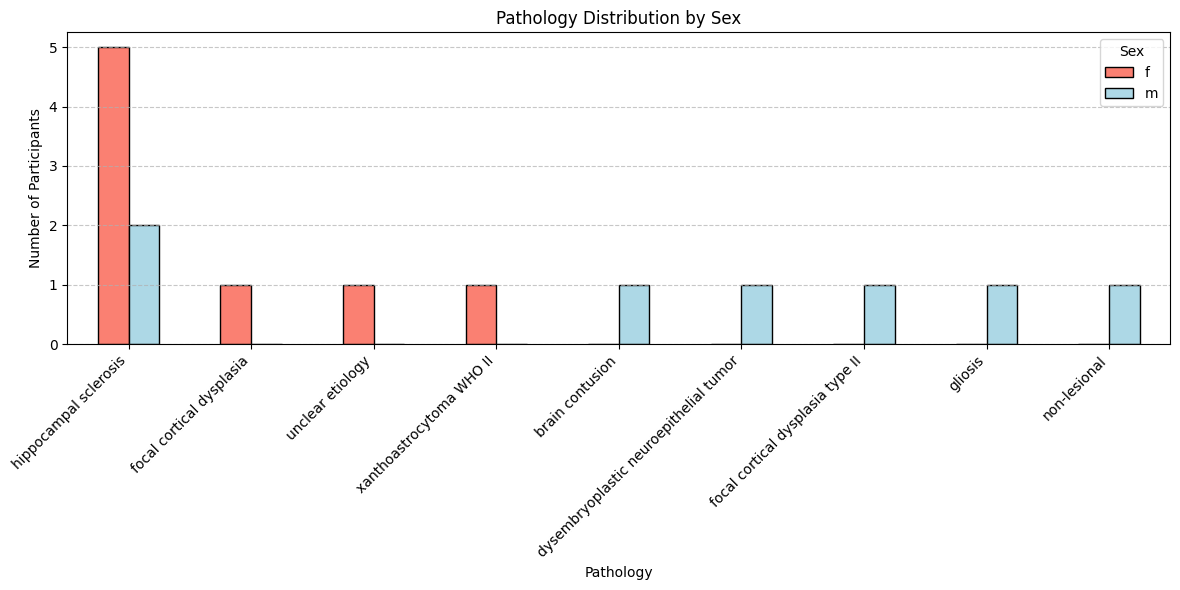

In [ ]:
# Creating a cross-tabulation of pathology by sex
pathology_sex_crosstab = pd.crosstab(data['pathology'], data['sex'])

# Plotting the Pathology Distribution by Sex
pathology_sex_crosstab.sort_values(by='f', ascending=False).plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightblue'], edgecolor='black')
plt.title('Pathology Distribution by Sex')
plt.xlabel('Pathology')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Load the EEG data from the EDF file
raw = mne.io.read_raw_edf('data/sub-01/ses-01/ieeg/sub-01_ses-01_task-verbalWM_run-01_ieeg.edf', preload=True)

# Get the sampling frequency
sfreq = raw.info['sfreq']

# Get the data as a numpy array
data = raw.get_data()

# Get the channel names
ch_names = raw.info['ch_names']

# Get the channel info
ch_info = raw.info['chs']

# Get the number of channels
n_ch = len(ch_names)

print('The sampling frequency is {} Hz'.format(sfreq))
print('The data shape is {}'.format(data.shape))
print('The channel names are {}'.format(ch_names))
print('The channel info is {}'.format(ch_info))
print('The number of channels is {}'.format(n_ch))


Extracting EDF parameters from /home/pappol/Scrivania/uni/medical/EEGNet/data/sub-01/ses-01/ieeg/sub-01_ses-01_task-verbalWM_run-01_ieeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 799999  =      0.000 ...   400.000 secs...
The sampling frequency is 2000.0 Hz
The data shape is (48, 800000)
The channel names are ['mAHL1', 'mAHL2', 'mAHL3', 'mAHL4', 'mAHL5', 'mAHL6', 'mAHL7', 'mAHL8', 'mAL1', 'mAL2', 'mAL3', 'mAL4', 'mAL5', 'mAL6', 'mAL7', 'mAL8', 'mECL1', 'mECL2', 'mECL3', 'mECL4', 'mECL5', 'mECL6', 'mECL7', 'mECL8', 'mLR1', 'mLR2', 'mLR3', 'mLR4', 'mLR5', 'mLR6', 'mLR7', 'mLR8', 'mPHL1', 'mPHL2', 'mPHL3', 'mPHL4', 'mPHL5', 'mPHL6', 'mPHL7', 'mPHL8', 'mPHR1', 'mPHR2', 'mPHR3', 'mPHR4', 'mPHR5', 'mPHR6', 'mPHR7', 'mPHR8']
The channel info is [{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'mAHL1', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFF

Using matplotlib as 2D backend.


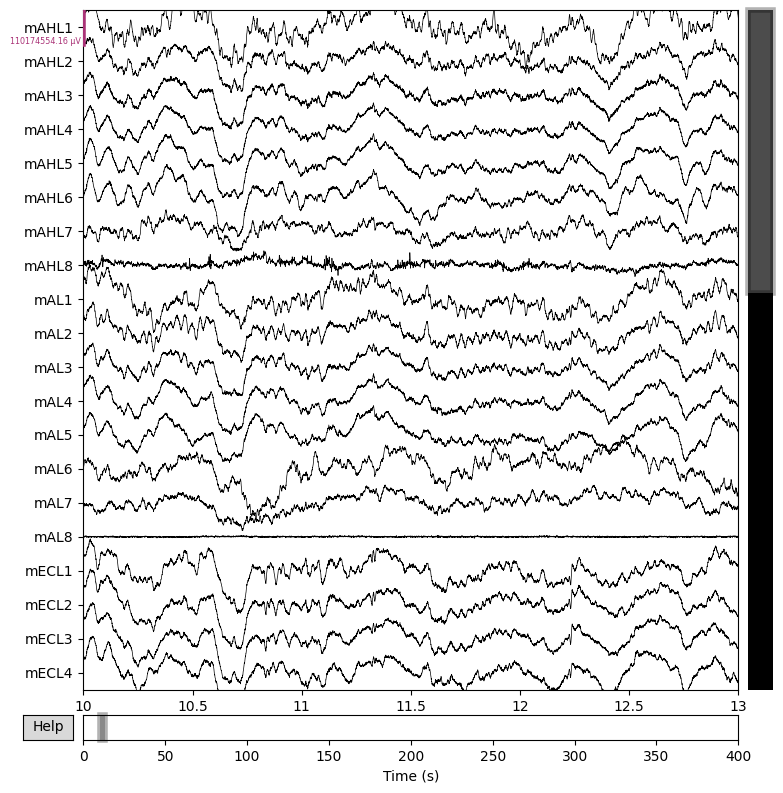

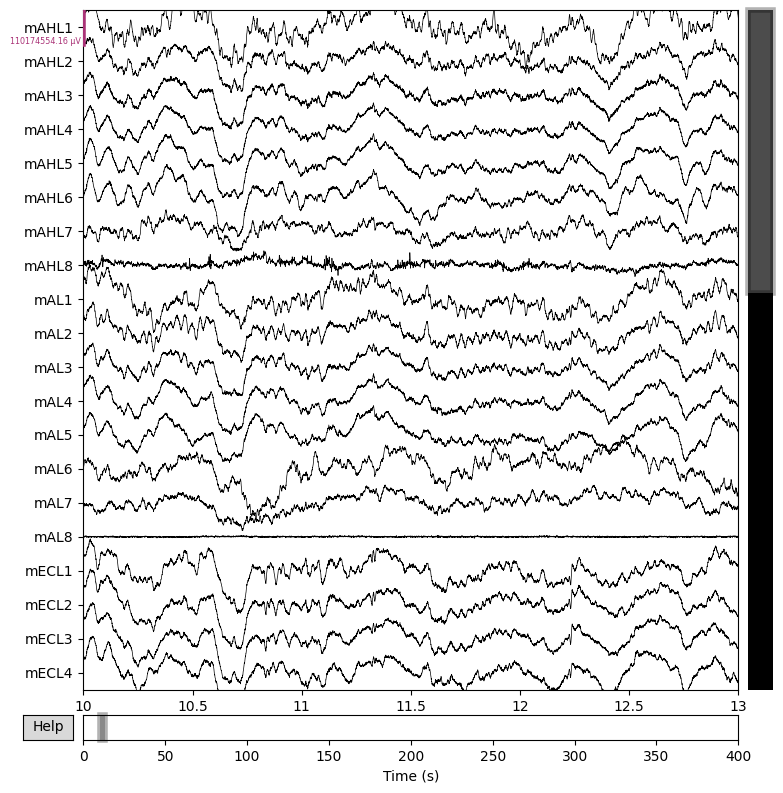

In [ ]:
# Plot a snippet of the EEG data
raw.plot(start=10, duration=3, scalings='auto', show=True)

Effective window size : 1.024 (s)


/tmp/ipykernel_45158/2635844998.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")


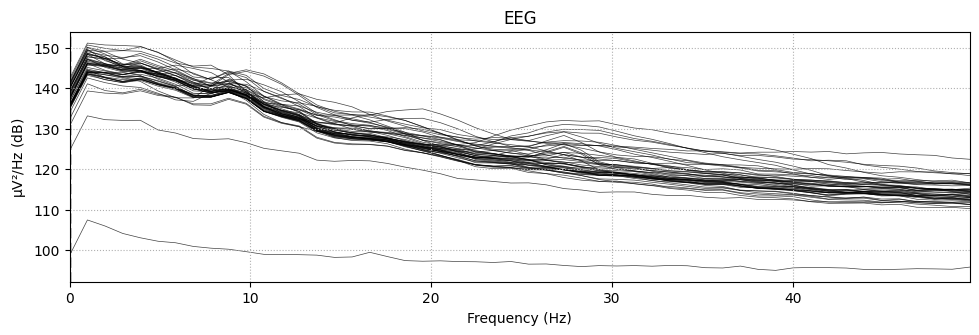

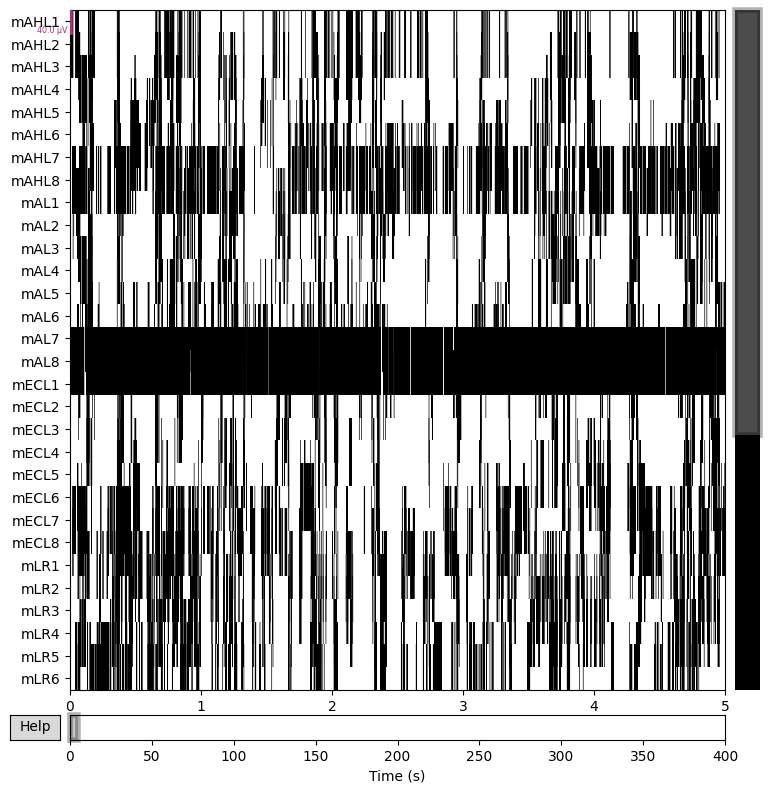

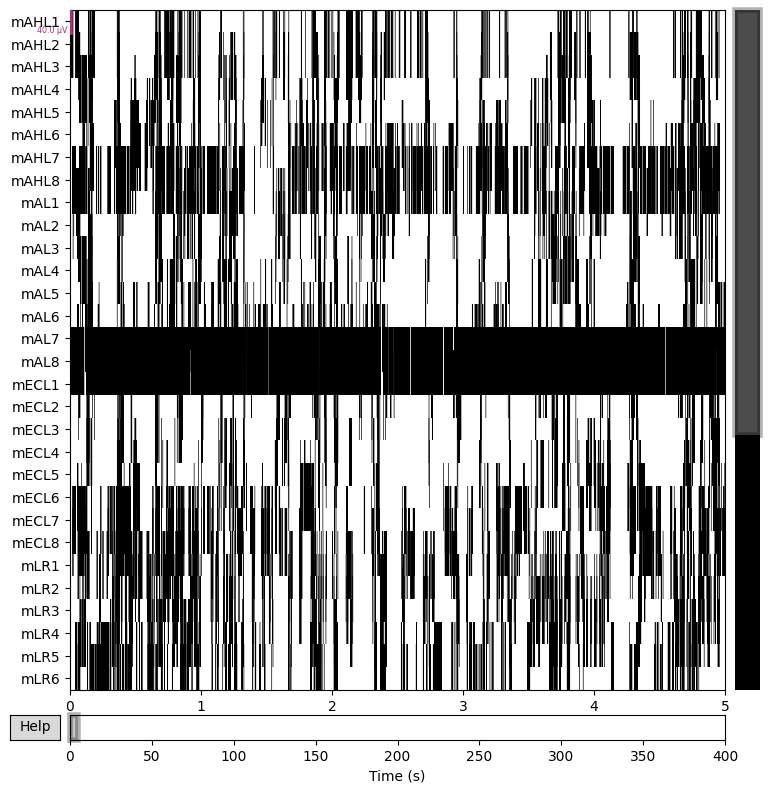

In [ ]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=30)

In [ ]:
#apply high pass filter on the data
raw.filter(l_freq=1, h_freq=None, fir_design='firwin', skip_by_annotation='edge')

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 6601 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<RawEDF | sub-01_ses-01_task-verbalWM_run-01_ieeg.edf, 48 x 800000 (400.0 s), ~293.0 MB, data loaded>

In [ ]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=15, random_state=97, max_iter=800)
ica.fit(raw)


Fitting ICA to data using 48 channels (please be patient, this may take a while)


Selecting by number: 15 components
Fitting ICA took 11.1s.


Method,fastica
Fit,28 iterations on raw data (800000 samples)
ICA components,15
Available PCA components,48
Channel types,eeg
ICA components marked for exclusion,—
